In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

La idea de este Notebook es implementar una regresión logística manualmante. Primero se crea un df con las notas de n alumnos las cuales se generan aleatoriamente, y se hacen los cálculos necesarios para la nota definitiva y para determinar si se aprueba o no. Luego se implementará  la clase LogisticRegression con sus métodos y atributos necesarios

In [167]:
#Notas aleatorias entre 0 y 5 con una solo cifra decimal 
n=1000
x_1 = [int(rnd.random()*5.1*10)/10 for i in range(n)]
x_2 = [int(rnd.random()*5.1*10)/10 for i in range(n)]
x_3 = [int(rnd.random()*5.1*10)/10 for i in range(n)]
x_4 = [int(rnd.random()*5.1*10)/10 for i in range(n)]
x_p = [int(rnd.random()*5.1*10)/10 for i in range(n)]
x_f = [int(rnd.random()*5.1*10)/10 for i in range(n)]
# Cálculo de la nota definitiva
x_d = [round(((x1+x2+x3+x4)/4)*0.4 + xp*0.3 + xf*0.3, 1) for x1,x2,x3,x4,xp,xf in zip(x_1,x_2,x_3,x_4,x_p,x_f)]
#Determinando si ha aprobado o no
apr =[1 if xd >= 3 else 0 for xd in x_d]
df = pd.DataFrame({'N1':x_1,
                  'N2':x_2,
                  'N3':x_3,
                  'N4':x_4,
                  'P':x_p,
                  'F':x_f,
                  'def':x_d,
                  'aprobado':apr})

In [168]:
df.head(10)

,N1,N2,N3,N4,P,F,def,aprobado
0,1.4,0.8,1.5,2.0,2.7,2.3,2.1,0
1,3.6,4.9,1.9,3.0,3.6,3.8,3.6,1
2,4.2,2.4,2.7,0.3,4.8,0.6,2.6,0
3,0.0,3.6,5.0,4.2,3.5,4.6,3.7,1
4,0.2,2.8,5.0,1.0,2.3,1.9,2.2,0
5,0.3,1.6,2.7,2.2,3.3,4.9,3.1,1
6,3.5,3.4,0.6,3.8,1.0,1.7,1.9,0
7,3.5,3.4,4.0,1.6,0.8,4.4,2.8,0
8,4.2,0.8,2.7,2.2,2.9,2.8,2.7,0
9,1.3,4.6,1.5,1.8,4.6,1.4,2.7,0


In [170]:
df.describe()

,N1,N2,N3,N4,P,F,def,aprobado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.497800,2.435800,2.490600,2.482300,2.594700,2.477200,2.51330,0.267000
std,1.489555,1.462134,1.461084,1.484655,1.467459,1.479192,0.66028,0.442614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.80000,0.000000
25%,1.300000,1.100000,1.200000,1.200000,1.300000,1.200000,2.10000,0.000000
50%,2.400000,2.400000,2.500000,2.500000,2.600000,2.450000,2.50000,0.000000
75%,3.900000,3.700000,3.725000,3.725000,3.900000,3.800000,3.00000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.30000,1.000000


In [179]:
#Número de alumnos aprobadas
df['aprobado'][df['aprobado'] == 1].count()

267

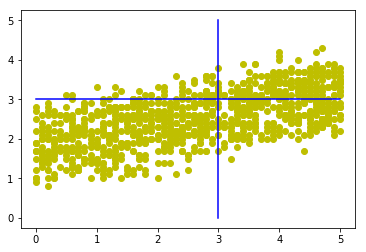

In [227]:
#Importancia del parcial con respecto a la nota definitiva
plt.plot(x_p, x_d, 'yo')
plt.plot([0,5],[3,3],'b')
plt.plot([3,3],[0,5],'b')
plt.show()

In [201]:
x_train = df.drop(['N3','N4','F','aprobado','def'],axis =1)
y_train = pd.DataFrame({'aprobado':df['aprobado']})
x_train.head()

,N1,N2,P
0,1.4,0.8,2.7
1,3.6,4.9,3.6
2,4.2,2.4,4.8
3,0.0,3.6,3.5
4,0.2,2.8,2.3


In [181]:
from sklearn.linear_model import LogisticRegression

Probando la regresion logistica de sklearn

In [228]:
model = LogisticRegression()
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [216]:
n_al = 15
df_test = pd.DataFrame({
    'N1':[int(rnd.random()*5.1*10)/10 for i in range(n_al)],
    'N2':[int(rnd.random()*5.1*10)/10 for i in range(n_al)],
    'P':[int(rnd.random()*5.1*10)/10 for i in range(n_al)],
    'aprobado':[0 for i in range(n_al)]
})

In [221]:
df_test['aprobado'] = model.predict(df_test.drop(['aprobado'],axis=1))

In [222]:
df_test.head(10)

,N1,N2,P,aprobado
0,1.2,1.0,4.0,0
1,2.6,4.3,4.8,1
2,3.0,0.2,4.2,0
3,4.6,1.7,4.0,1
4,3.2,3.7,1.3,0
5,1.1,1.4,3.9,0
6,1.4,3.0,0.9,0
7,4.3,2.5,2.0,0
8,4.0,1.4,4.6,1
9,1.5,4.0,0.5,0


Implementación del al Regresión Logística

In [225]:
class RegresionLogistica():
   
    def __init__(lr = 0.1):
        self.lr = lr
        self.b = []
    
    def fit(x, y, is_norm = False):
        self.b = [0.0 for i in range(x.shape(0))]
        
    def predict(x):
        pass
        
    def get_probability(sample):
        pass
        